In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
#uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         238 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0        conda-forge
    geopy:         1.20.0-py_0      conda-forge

The following pac

In [3]:
import pandas as pd
Amsterdam_AB_DF = pd.read_csv("Amsterdam_AB_Data.csv")
Amsterdam_AB_DF.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,28-11-18,2.10,1,44
1,3209,"Quiet apt near center, great view",3806,Maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,29-08-18,1.03,1,47
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,30-11-18,2.18,2,198
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,21-01-18,0.09,2,141
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,2,171,25-11-18,2.03,1,199


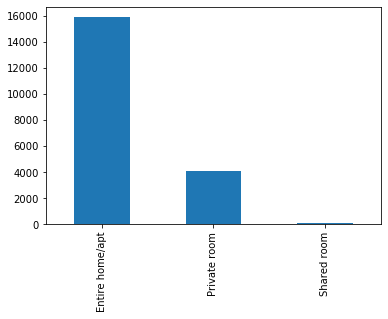

In [5]:
Amsterdam_AB_DF.room_type.value_counts().plot(kind='bar')

In [61]:
import datetime
pd.to_datetime(Amsterdam_AB_DF.last_review).dt.year.value_counts()

2018.0    13208
2017.0     2725
2016.0     1276
2015.0      356
2014.0       43
2013.0       11
2012.0        4
2011.0        1
Name: last_review, dtype: int64

In [4]:
Amsterdam_AB_DF=Amsterdam_AB_DF[pd.to_datetime(Amsterdam_AB_DF.last_review).dt.year>=2018]

In [5]:
Amsterdam_AB_DF=Amsterdam_AB_DF[Amsterdam_AB_DF.minimum_nights<=7]

In [6]:
Amsterdam_AB_DF=Amsterdam_AB_DF[Amsterdam_AB_DF.number_of_reviews>1]

In [9]:
Amsterdam_AB_DF.price.describe()

count    12364.000000
mean       150.814623
std         98.899326
min          0.000000
25%         99.000000
50%        130.000000
75%        175.000000
max       5040.000000
Name: price, dtype: float64

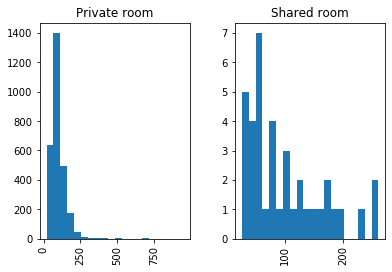

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
Amsterdam_AB_DF[(Amsterdam_AB_DF['room_type'].isin( ['Private room','Shared room']))&(Amsterdam_AB_DF.price<=3000)].hist(column='price',by='room_type',bins=20)
plt.show()

In [8]:
DF_Final=Amsterdam_AB_DF.groupby('neighbourhood').agg({'id':'count','price':'mean','number_of_reviews':'mean'})
DF_Final.columns = ['number_of_listings','avg_price','avg_review_count']
DF_Final

,number_of_listings,avg_price,avg_review_count
neighbourhood,,,
Bijlmer-Centrum,66,103.409091,41.090909
Bijlmer-Oost,59,88.457627,34.000000
Bos en Lommer,708,117.156780,25.929379
Buitenveldert - Zuidas,128,137.617188,20.507812
Centrum-Oost,1108,185.080325,41.322202
Centrum-West,1582,191.352086,45.010746
De Aker - Nieuw Sloten,87,113.114943,48.471264
De Baarsjes - Oud-West,2172,145.706262,27.480203
De Pijp - Rivierenbuurt,1462,154.714090,28.514364


In [9]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         238 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0        conda-forge
    geopy:         1.20.0-py_0      conda-forge

The following pac

In [10]:
import pandas as pd 
import numpy as np 
Amsterdam_NBH= pd.read_csv("neighbourhoods.csv")
Amsterdam_NBH.head()
 

,neighbourhood_group,neighbourhood
0,NaN,Bijlmer-Centrum
1,NaN,Bijlmer-Oost
2,NaN,Bos en Lommer
3,NaN,Buitenveldert - Zuidas
4,NaN,Centrum-Oost


In [11]:
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 
AMS_NB_DF = pd.DataFrame(columns=column_names)
for nb in Amsterdam_NBH.neighbourhood:
    geolocator = Nominatim(user_agent="AMS_explorer")
    location = geolocator.geocode(nb +', Amsterdam')
    if location is None:
        latitude=np.nan
        longitude=np.nan
    else:
        latitude = location.latitude
        longitude = location.longitude
    AMS_NB_DF=AMS_NB_DF.append({'Neighborhood': nb,
                                          'Latitude': latitude,
                                          'Longitude': longitude
                     }, ignore_index=True)
AMS_NB_DF

,Neighborhood,Latitude,Longitude
0,Bijlmer-Centrum,NaN,NaN
1,Bijlmer-Oost,NaN,NaN
2,Bos en Lommer,52.378521,4.848738
3,Buitenveldert - Zuidas,52.336020,4.865890
4,Centrum-Oost,52.358983,4.924509
5,Centrum-West,52.373730,4.895691
6,De Aker - Nieuw Sloten,NaN,NaN
7,De Baarsjes - Oud-West,NaN,NaN
8,De Pijp - Rivierenbuurt,52.346579,4.917350
9,Gaasperdam - Driemond,52.312666,4.989188


In [12]:
nb_new =Amsterdam_AB_DF[ Amsterdam_AB_DF.neighbourhood.isin(AMS_NB_DF[AMS_NB_DF.Latitude.isnull()].Neighborhood.tolist())]

nb_new=nb_new.groupby('neighbourhood')['latitude','longitude'].mean().reset_index()


In [13]:
nb_new.columns =['Neighborhood', 'Latitude', 'Longitude']
nb_new

,Neighborhood,Latitude,Longitude
0,Bijlmer-Centrum,52.317257,4.950483
1,Bijlmer-Oost,52.321193,4.975637
2,De Aker - Nieuw Sloten,52.346370,4.796833
3,De Baarsjes - Oud-West,52.366158,4.862715
4,IJburg - Zeeburgereiland,52.357980,4.990731
5,Oostelijk Havengebied - Indische Buurt,52.365996,4.938685


In [49]:
AMS_NB_DF.loc[AMS_NB_DF.Latitude.isnull(),'Latitude']=nb_new.Latitude

In [50]:
AMS_NB_DF.loc[AMS_NB_DF.Longitude.isnull(),'Longitude']=nb_new.Longitude

In [51]:
AMS_NB_DF

,Neighborhood,Latitude,Longitude
0,Bijlmer-Centrum,52.317257,4.950483
1,Bijlmer-Oost,52.321193,4.975637
2,Bos en Lommer,52.378521,4.848738
3,Buitenveldert - Zuidas,52.336020,4.865890
4,Centrum-Oost,52.358983,4.924509
5,Centrum-West,52.373730,4.895691
6,De Aker - Nieuw Sloten,NaN,NaN
7,De Baarsjes - Oud-West,NaN,NaN
8,De Pijp - Rivierenbuurt,52.346579,4.917350
9,Gaasperdam - Driemond,52.312666,4.989188


In [14]:
AMS_NB_DF.dropna(inplace=True)
AMS_NB_DF

,Neighborhood,Latitude,Longitude
2,Bos en Lommer,52.378521,4.848738
3,Buitenveldert - Zuidas,52.336020,4.865890
4,Centrum-Oost,52.358983,4.924509
5,Centrum-West,52.373730,4.895691
8,De Pijp - Rivierenbuurt,52.346579,4.917350
9,Gaasperdam - Driemond,52.312666,4.989188
10,Geuzenveld - Slotermeer,52.378936,4.800760
12,Noord-Oost,52.355053,4.950978
13,Noord-West,52.374540,4.897976
15,Osdorp,52.357304,4.799671


In [15]:
AMS_NB_DF = pd.concat([AMS_NB_DF,nb_new],ignore_index=True)

In [16]:
AMS_NB_DF.set_index('Neighborhood',inplace=True)

In [17]:
AMS_NB_DF

,Latitude,Longitude
Neighborhood,,
Bos en Lommer,52.378521,4.848738
Buitenveldert - Zuidas,52.336020,4.865890
Centrum-Oost,52.358983,4.924509
Centrum-West,52.373730,4.895691
De Pijp - Rivierenbuurt,52.346579,4.917350
Gaasperdam - Driemond,52.312666,4.989188
Geuzenveld - Slotermeer,52.378936,4.800760
Noord-Oost,52.355053,4.950978
Noord-West,52.374540,4.897976


In [1]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge

The following packages will be UPDATED:

    certifi: 2019.6.16-py36_1 conda-forge --> 2019.9.11-py36_0 conda-forge


certifi-2019.9.11    | 147 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [23]:
from geopy.geocoders import Nominatim
address = 'Amsterdam, Netherlands'
geolocator = Nominatim(user_agent="Amsterdam")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [24]:
# create map of New York using latitude and longitude values
map_amsterdam = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(AMS_NB_DF['Latitude'], AMS_NB_DF['Longitude'], AMS_NB_DF['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_amsterdam)  
    
map_amsterdam

In [23]:
geolocator = Nominatim(user_agent="AMS_explorer")
location = geolocator.geocode('Buitenveldert - Zuidas')
latitude = location.latitude
longitude = location.longitude
location.longitude

4.86589030546994

,number_of_listings,avg_price,avg_review_count
neighbourhood,,,
Bijlmer-Centrum,66,103.409091,41.090909
Bijlmer-Oost,59,88.457627,34.000000
Bos en Lommer,708,117.156780,25.929379
Buitenveldert - Zuidas,128,137.617188,20.507812
Centrum-Oost,1108,185.080325,41.322202
Centrum-West,1582,191.352086,45.010746
De Aker - Nieuw Sloten,87,113.114943,48.471264
De Baarsjes - Oud-West,2172,145.706262,27.480203
De Pijp - Rivierenbuurt,1462,154.714090,28.514364


In [17]:
DF_Final=DF_Final.join(AMS_NB_DF[['Latitude','Longitude']],how='inner')
DF_Final

,number_of_listings,avg_price,avg_review_count,Latitude,Longitude
Bijlmer-Centrum,66,103.409091,41.090909,52.317257,4.950483
Bijlmer-Oost,59,88.457627,34.000000,52.321193,4.975637
Bos en Lommer,708,117.156780,25.929379,52.378521,4.848738
Buitenveldert - Zuidas,128,137.617188,20.507812,52.336020,4.865890
Centrum-Oost,1108,185.080325,41.322202,52.358983,4.924509
Centrum-West,1582,191.352086,45.010746,52.373730,4.895691
De Aker - Nieuw Sloten,87,113.114943,48.471264,52.346370,4.796833
De Baarsjes - Oud-West,2172,145.706262,27.480203,52.366158,4.862715
De Pijp - Rivierenbuurt,1462,154.714090,28.514364,52.346579,4.917350
Gaasperdam - Driemond,84,90.428571,30.333333,52.312666,4.989188


In [18]:
DF_Final.index.name="Neighborhood"
DF_Final

,number_of_listings,avg_price,avg_review_count,Latitude,Longitude
Neighborhood,,,,,
Bijlmer-Centrum,66,103.409091,41.090909,52.317257,4.950483
Bijlmer-Oost,59,88.457627,34.000000,52.321193,4.975637
Bos en Lommer,708,117.156780,25.929379,52.378521,4.848738
Buitenveldert - Zuidas,128,137.617188,20.507812,52.336020,4.865890
Centrum-Oost,1108,185.080325,41.322202,52.358983,4.924509
Centrum-West,1582,191.352086,45.010746,52.373730,4.895691
De Aker - Nieuw Sloten,87,113.114943,48.471264,52.346370,4.796833
De Baarsjes - Oud-West,2172,145.706262,27.480203,52.366158,4.862715
De Pijp - Rivierenbuurt,1462,154.714090,28.514364,52.346579,4.917350


In [19]:
CLIENT_ID = 'K0AKGGALTEX31E55HZXD3BU2B5HE3TWVAXTM3EF2R5MJEM0T' # your Foursquare ID
CLIENT_SECRET = 'XEI34W1LH5EJW0G3RDVAPIUXYP11HPR04JNNNPYVKUUQ3JXT' # your Foursquare Secret
VERSION = '20190926' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: K0AKGGALTEX31E55HZXD3BU2B5HE3TWVAXTM3EF2R5MJEM0T
CLIENT_SECRET:XEI34W1LH5EJW0G3RDVAPIUXYP11HPR04JNNNPYVKUUQ3JXT


In [20]:
LIMIT = 100
radius = 500
category_Id='4d4b7104d754a06370d81259'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
   category_Id
    
)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=K0AKGGALTEX31E55HZXD3BU2B5HE3TWVAXTM3EF2R5MJEM0T&client_secret=XEI34W1LH5EJW0G3RDVAPIUXYP11HPR04JNNNPYVKUUQ3JXT&v=20190926&ll=52.3444702,4.8786639&radius=500&limit=100&categoryId=4d4b7104d754a06370d81259'

In [22]:
import requests
results =requests.get(url).json()
results

{'meta': {'code': 429,
  'errorType': 'quota_exceeded',
  'errorDetail': 'Quota exceeded',
  'requestId': '5d98804789b06a002c69bf67'},
 'response': {}}

In [88]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [111]:
venues = results['response']
venues

{}

In [91]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

KeyError: 'groups'

In [84]:

def getNearbyVenues(names, latitudes, longitudes,main_category, radius=500):
    
    venues_list=[]
    LIMIT = 100
    radius = 500
    for name, lat, lng  in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
   main_category
    
)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            main_cat_tourists[main_category]) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                   'Main Category']
    
    return(nearby_venues)

In [72]:
main_cat_tourists={'4d4b7104d754a06370d81259':'Arts & Entertainment',
'4d4b7105d754a06374d81259':'Food',
'4d4b7105d754a06376d81259':'Nightlife Spot',
'4d4b7105d754a06377d81259':'Outdoors & Recreation',
'4d4b7105d754a06378d81259':'Shop & Service'}
main_cat_tourists['4d4b7105d754a06376d81259']
list(main_cat_tourists.keys())[0]

'4d4b7104d754a06370d81259'

In [86]:
 getNearbyVenues(names=DF_Final.index,
    latitudes=DF_Final['Latitude'],
    longitudes=DF_Final['Longitude'],
    main_category = '4d4b7105d754a06376d81259')

KeyError: 'groups'

In [85]:
column_names = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue',  
                'Venue Latitude', 'Venue Longitude', 
            'Venue Category',
                   'Main Category']
neighborhood_venues_all = pd.DataFrame(columns=column_names)
for k in main_cat_tourists:
    getNearbyVenues(names=DF_Final.index,
    latitudes=DF_Final['Latitude'],
    longitudes=DF_Final['Longitude'],
    main_category = k)
    neighborhood_venues_all = pd.concat([neighborhood_venues_all,neighborhood_venues],ignore_index=True)
neighborhood_venues_all

KeyError: 'groups'

In [78]:
neighborhood_venues_all['Main Category'].unique()

array(['Arts & Entertainment'], dtype=object)

In [82]:
neighborhood_venues_all

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Main Category


In [104]:
neighborhood_venues_all.groupby(['Neighborhood','Main Category'])['Venue'].count()

Series([], Name: Venue, dtype: int64)

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread(r'C:\Capstone_Proj\Lsiting_Data.jpg')
plt.imshow(image)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Capstone_Proj\\Lsiting_Data.jpg'

![](Lsiting_Data.jpg)